In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # using seaborn for data visualization
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

import glob
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
# Creating our data
eda_train_data = pd.read_csv('combined/classification/wesad-classification-eda-train-dataset.csv')
eda_validation_data = pd.read_csv('combined/classification/wesad-classification-eda-validation-dataset.csv')
eda_test_data = pd.read_csv('combined/classification/wesad-classification-eda-test-dataset.csv')

eda_train_data.dtypes

MEAN                        float64
MAX                         float64
MIN                         float64
RANGE                       float64
KURT                        float64
SKEW                        float64
MEAN_1ST_GRAD               float64
STD_1ST_GRAD                float64
MEAN_2ND_GRAD               float64
STD_2ND_GRAD                float64
ALSC                        float64
INSC                        float64
APSC                        float64
RMSC                        float64
subject id                    int64
MEAN_LOG                    float64
INSC_LOG                    float64
APSC_LOG                    float64
RMSC_LOG                    float64
RANGE_LOG                   float64
ALSC_LOG                    float64
MIN_LOG                     float64
MEAN_1ST_GRAD_LOG           float64
MEAN_2ND_GRAD_LOG           float64
MIN_LOG_LOG                 float64
MEAN_1ST_GRAD_LOG_LOG       float64
MEAN_2ND_GRAD_LOG_LOG       float64
APSC_LOG_LOG                

# Data Conversion
STRESS = 2
AMUSEMENT = 1
BASELINE = 0

In [3]:
# Preprocessing our training data
eda_train_data.drop('condition', axis=1, inplace=True)
eda_train_data.drop('subject id', axis=1, inplace=True)
eda_train_data.drop('SSSQ class', axis=1, inplace=True)

#
# Grab values to create a numpy array
eda_train_df = eda_train_data.iloc[:, 0:45].values
eda_train_labels_df = eda_train_data.iloc[:, 45].values

# Grab values to create a numpy array
eda_test_df = eda_test_data.iloc[:, 0:45].values
eda_test_labels_df = eda_test_data.iloc[:, 45].values

sc = StandardScaler()
eda_train_X = sc.fit_transform(eda_train_df)

sc2 = StandardScaler()
eda_test_X = sc2.fit_transform(eda_test_df)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

batch_size = 128
epochs = 8
categorical_labels = to_categorical(eda_train_labels_df, num_classes=3)

model = Sequential()

model = Sequential()
model.add(Dense(32, input_dim=45, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(eda_train_X, categorical_labels, epochs=epochs, batch_size=batch_size)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/8
27158/27158 [==============================] - 0s 13us/sample - loss: 0.7785 - acc: 0.6730
Epoch 2/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.4902 - acc: 0.8108
Epoch 3/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.3119 - acc: 0.8880
Epoch 4/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.2004 - acc: 0.9369
Epoch 5/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.1325 - acc: 0.9679
Epoch 6/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.0915 - acc: 0.9799
Epoch 7/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.0683 - acc: 0.9870
Epoch 8/8
27158/27158 [==============================] - 0s 9us/sample - loss: 0.0513 - acc: 0.9913


In [5]:
# Creating our testing data 

eda_test_data.drop('condition', axis=1, inplace=True)
eda_test_data.drop('subject id', axis=1, inplace=True)
eda_test_data.drop('SSSQ class', axis=1, inplace=True)

# Grab values to create a numpy array
eda_test_df = eda_train_data.iloc[:, 0:45].values
eda_test_labels_df = eda_train_data.iloc[:, 45].values

sc2 = StandardScaler()

eda_test_X = sc2.fit_transform(eda_test_df)

# Convert data into a normalized distribution

In [6]:
categorical_test_labels = to_categorical(eda_test_labels_df, num_classes=3)
_, accuracy = model.evaluate(eda_test_X, categorical_test_labels)
print('Accuracy: %.2f' % (accuracy*100))

27158/27158 [==============================] - 0s 13us/sample - loss: 0.0442 - acc: 0.9940
Accuracy: 99.40


Using TensorFlow backend.


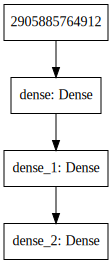

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

KeyError: 'val_acc'

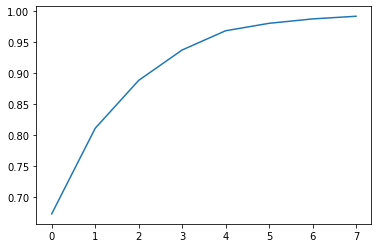

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()